<a href="https://colab.research.google.com/github/Nikithalaksh/most-subscribed-youtube-channel-project/blob/main/The_most_subscribed_YouTube_channel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The most subscribed youtube channels:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 



In [3]:
data_frame = pd.read_csv('/content/most_subscribed_youtube_channels.csv')

In [5]:
data_frame.head()

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
3,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
4,5,Music,"116,000,000",0,0,NaN,2013


In [6]:
data_frame.tail()

,rank,Youtuber,subscribers,video views,video count,category,started
995,996,JP Plays,"10,900,000","4,609,300,218","3,528",Gaming,2014
996,997,TrapMusicHDTV,"10,900,000","4,070,521,973",690,Music,2013
997,998,Games EduUu,"10,900,000","3,093,784,767","1,006",Gaming,2011
998,999,Hueva,"10,900,000","3,040,301,750",831,Gaming,2012
999,1000,Dobre Brothers,"10,900,000","2,808,411,693",590,People & Blogs,2017


In [7]:
data_frame.shape

(1000, 7)

In [8]:
data_frame.describe()

,rank,started
count,1000.000000,1000.000000
mean,500.500000,2012.376000
std,288.819436,3.998076
min,1.000000,1970.000000
25%,250.750000,2010.000000
50%,500.500000,2013.000000
75%,750.250000,2015.000000
max,1000.000000,2021.000000


In [10]:
data_frame.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'video count',
       'category', 'started'],
      dtype='object')

In [11]:
data_frame.duplicated().sum()

0

In [12]:
data_frame.isnull().sum()

rank            0
Youtuber        0
subscribers     0
video views     0
video count     0
category       27
started         0
dtype: int64

In [13]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Youtuber     1000 non-null   object
 2   subscribers  1000 non-null   object
 3   video views  1000 non-null   object
 4   video count  1000 non-null   object
 5   category     973 non-null    object
 6   started      1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [14]:
data_frame.nunique()

rank           1000
Youtuber        999
subscribers     286
video views     991
video count     856
category         18
started          18
dtype: int64

In [15]:
data_frame['category'].fillna('unknown', inplace = True)

In [16]:
data_frame['category'].unique()

array(['Music', 'Film & Animation', 'Education', 'Shows', 'unknown',
       'Gaming', 'Entertainment', 'People & Blogs', 'Sports',
       'Howto & Style', 'News & Politics', 'Comedy', 'Trailers',
       'Nonprofits & Activism', 'Science & Technology', 'Movies',
       'Pets & Animals', 'Autos & Vehicles', 'Travel & Events'],
      dtype=object)

In [17]:
data_frame['category'].value_counts()

Entertainment            241
Music                    222
People & Blogs           119
Gaming                   102
Comedy                    63
Film & Animation          52
Education                 46
Howto & Style             45
unknown                   27
News & Politics           27
Science & Technology      18
Shows                     14
Sports                    10
Pets & Animals             6
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           1
Travel & Events            1
Name: category, dtype: int64

In [19]:
import warnings 
warnings.filterwarnings('ignore')

To determine the category with the number of viewers:

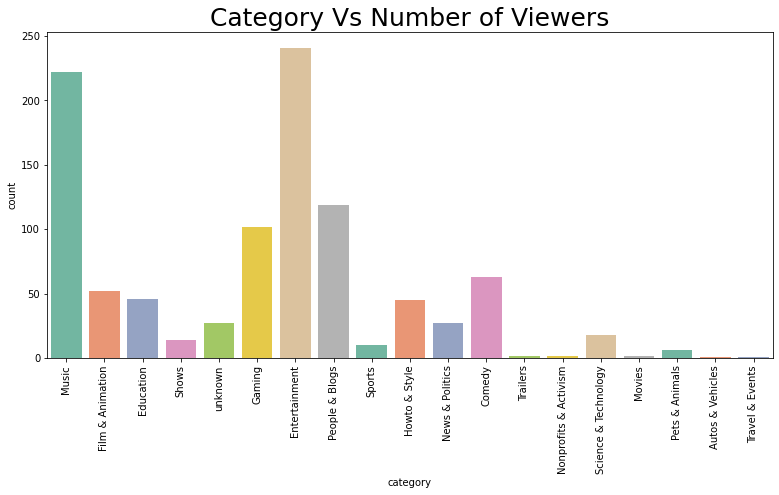

In [77]:
plt.figure(figsize = [13,6])
sns.countplot(data_frame['category'], data = data_frame, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Category Vs Number of Viewers', size = 25);
plt.show()

In [31]:
import plotly.express as px

To represent the categories through pie chart for easy understanding:

In [92]:
categories = data_frame['category'].value_counts()
fig = px.pie(values = categories.values, names = categories.index,
             color_discrete_sequence = px.colors.sequential.RdBu_r,
             title = 'Categories of Youtube channel')
fig.update_traces(textposition ='inside',
                  textfont_size = 12,
                  textinfo = 'percent+label')
fig.show()

To determine the start year of the youtube channels

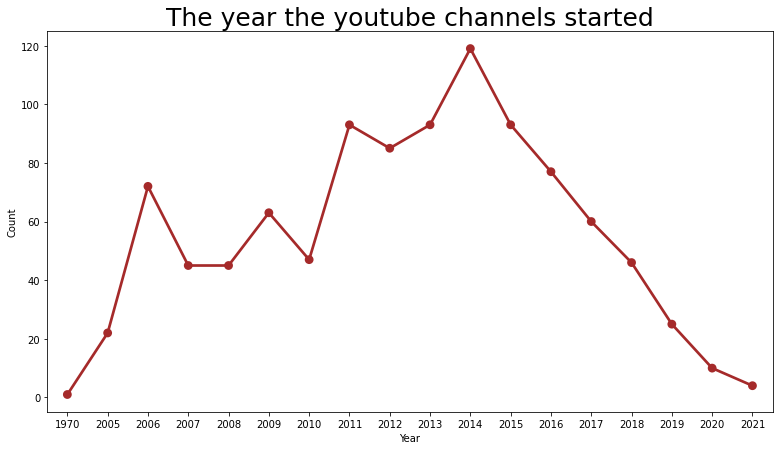

In [72]:
year = data_frame['started'].value_counts()
plt.figure(figsize =(13,7))
sns.pointplot(x=year.index,y=year.values, color ='brown')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('The year the youtube channels started',size = 25, color = 'black');

In [75]:
year_mean = data_frame.groupby('started').mean().reset_index()
year_mean

,started,rank,subscribers
0,1970,100.000000,3.330000e+07
1,2005,423.590909,2.197273e+07
2,2006,426.625000,2.767361e+07
3,2007,466.866667,2.365111e+07
4,2008,452.533333,2.118222e+07
5,2009,468.460317,2.001111e+07
6,2010,532.127660,1.935957e+07
7,2011,485.204301,1.981720e+07
8,2012,487.752941,2.116588e+07
9,2013,463.483871,2.200108e+07


To know the subscribers for each category:

In [60]:
data_frame['subscribers'] = data_frame['subscribers'].str.replace(',','')
data_frame['subscribers'] = data_frame['subscribers'].astype('int64')

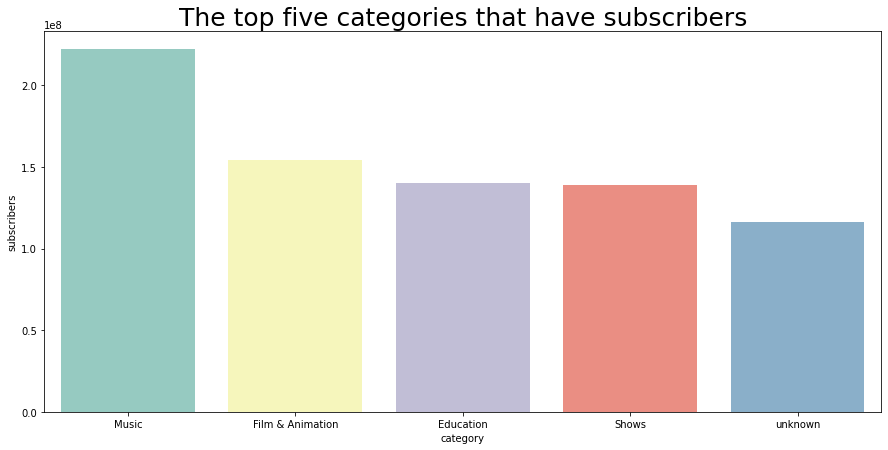

In [73]:
subscribers = data_frame.sort_values('subscribers', ascending= False)
plt.figure(figsize=(15,7))
subscribers = subscribers[:5]
sns.barplot(x ='category', 
              y='subscribers', data = subscribers, palette ='Set3')
plt.title('The top five categories that have subscribers', size = 25);

Visualized pairwise relationship between rank,subscribers and started:

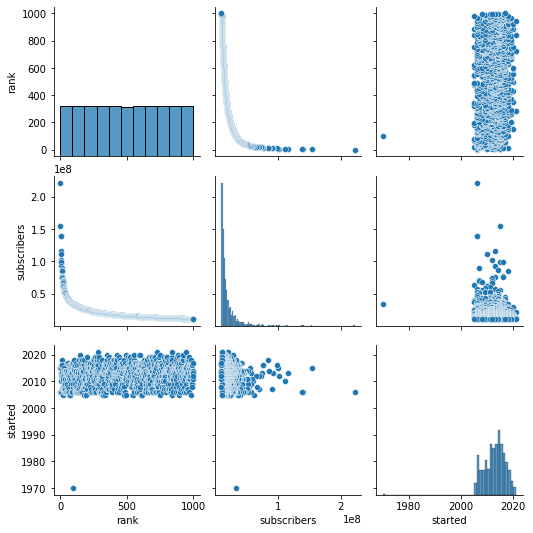

In [78]:
sns.pairplot(data_frame)
plt.show()

Representation of Heatmap in the project:

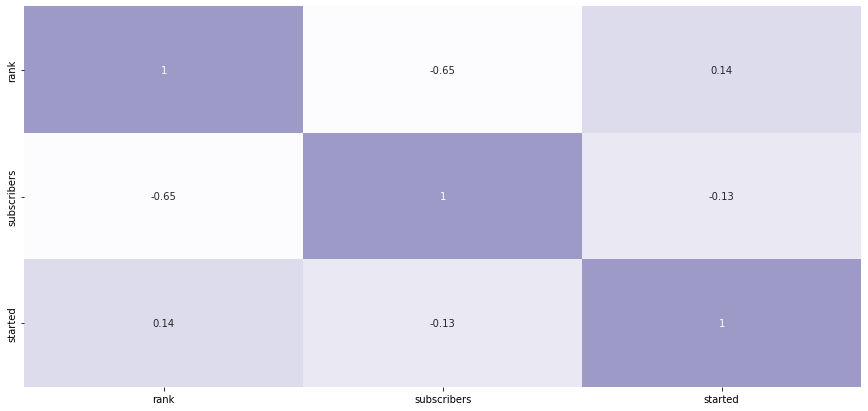

In [88]:
plt.figure(figsize=(15,7))
sns.heatmap(data_frame.corr(), annot = True, center =True, cmap ='Purples', cbar = False)
plt.show()
